> # Loan Approval Prediction

This dataset was taken from the Kaggle https://www.kaggle.com/hafidhfikri/loan-approval-prediction/data).   

The features are unlabeled, so we cannot perform feature sampling based on prior knowledge about how the features relate to the output label. We can, however, remove records with multiple erroneous or missing values as these samples could negatively impact the performance of our models. Comprehensively, we will be doing the following preprocessing tasks to prepare the data:

    - Locate missing data
    - Fill missing continuous values with column mean

## 1. Import Packages & Data

In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np

#import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#import train_test_split
from sklearn.model_selection import train_test_split

#import all the required classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read the data from train.csv
df = pd.read_csv('train.csv')

In [3]:
#preview data
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


ValueError: max must be larger than min in range parameter.

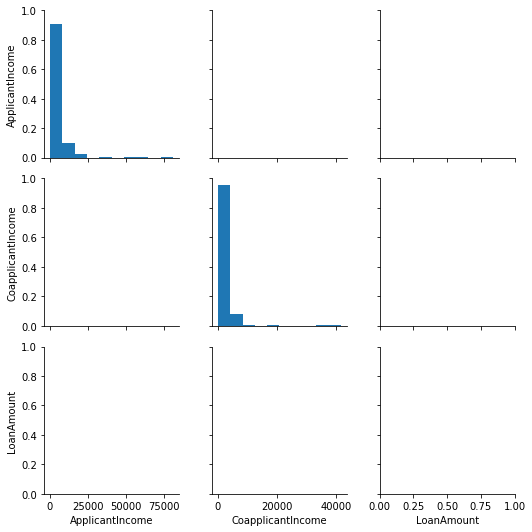

In [6]:
n=['ApplicantIncome','CoapplicantIncome','LoanAmount']
sns.pairplot(df[n])

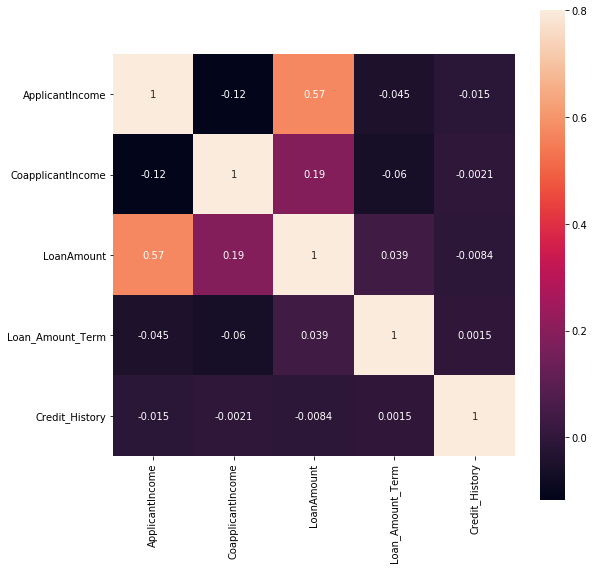

In [7]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,annot=True,square=True)

In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

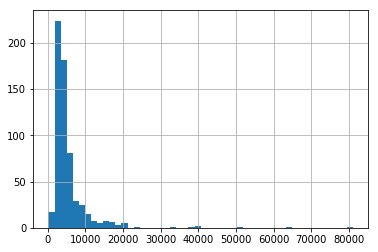

In [14]:
df['ApplicantIncome'].hist(bins=50)


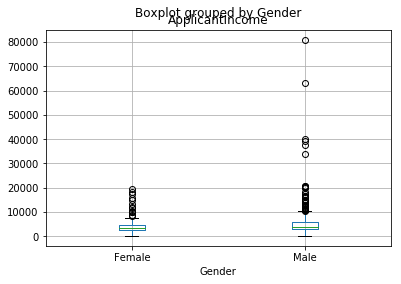

In [15]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

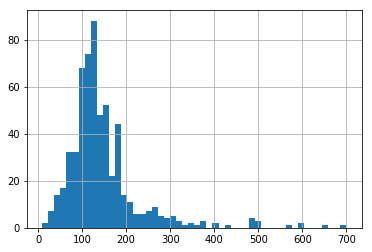

In [16]:
df['LoanAmount'].hist(bins=50)  #X-axis: the values of loan amount
#Y-axis: the frequencies of different values of loan amount


In [17]:
df['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [18]:
#creation of pivot tables using python
#the probability of getting loan as per the credit history
pt = df.pivot_table(values='Loan_Status',index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
pt

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


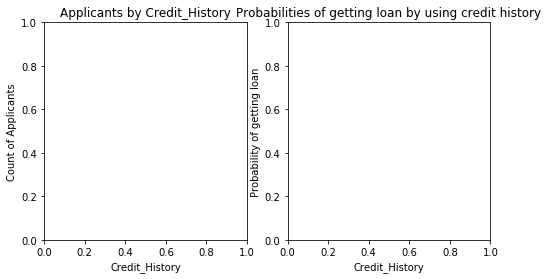

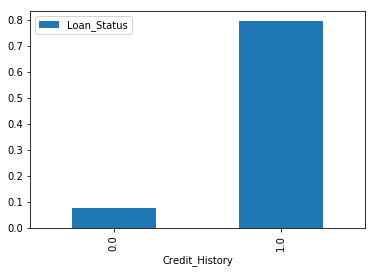

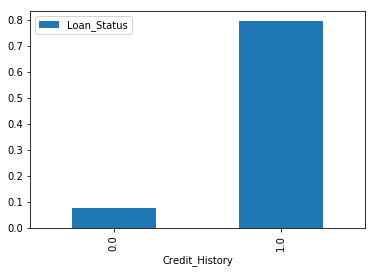

In [19]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
pt.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probabilities of getting loan by using credit history")
pt.plot(kind ='bar')

In [20]:
pv = df.pivot_table(values='Gender',index=['Credit_History'],aggfunc=lambda x: x.map({'Female':1,'Male':0}).mean())
pv

,Gender
Credit_History,
0.0,0.197674
1.0,0.180258


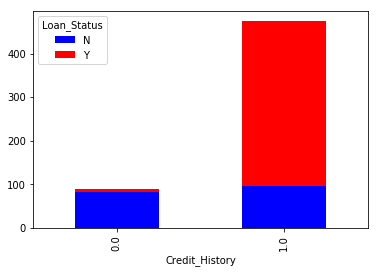

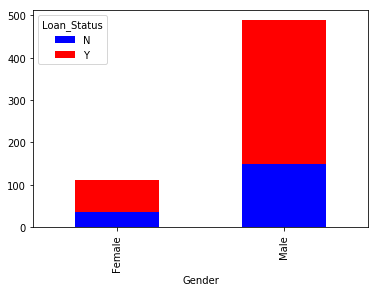

In [21]:
stack_chart = pd.crosstab(df['Credit_History'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['blue','red'], grid=False)
stack_chart = pd.crosstab(df['Gender'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['blue','red'], grid=False)

## 2. Data Quality & Missing Value Assesment

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [24]:
#Check missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
#to fill the missing values by mean 
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [26]:
selfemp = df['Self_Employed'].value_counts(ascending=True)
selfemp.head()

Yes     82
No     500
Name: Self_Employed, dtype: int64

In [27]:
#since *no* has 82% so, we will fill the missing values of column with "No"
df.Self_Employed = df.Self_Employed.fillna('No')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


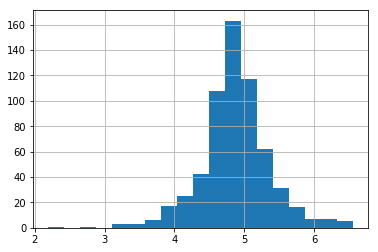

In [28]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) #log function to reduce the extreme effect in Loan amount (which we saw in the previous barplot)
df['LoanAmount_log'].hist(bins=19)

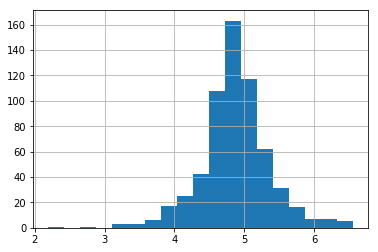

In [29]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=19)

In [30]:
df['Capacity%'] = ((df['LoanAmount'] / df['TotalIncome']) *100).astype(float) #capacity of each applicant of how well he/she is suited to pay back his loan.
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026,2.503200
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,2.101461
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,2.428658
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,2.350000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872,2.777489
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569,2.468174
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750,2.851986
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305,3.036876
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819,1.465832


In [31]:
#males are around ~81%, so we'll fill the missing values with "male"
df.Gender = df.Gender.fillna('Male')
gender = df['Gender'].value_counts(ascending=True)
gender.head()

Female    112
Male      502
Name: Gender, dtype: int64

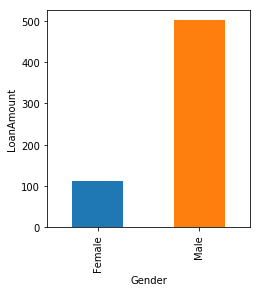

In [32]:
#which gender has more loan amount 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Gender')
ax1.set_ylabel('LoanAmount')

gender.plot(kind='bar')

In [33]:
married = df['Married'].value_counts(ascending=True)
married.head()



No     213
Yes    398
Name: Married, dtype: int64

In [34]:
#since 80% are 'Yes' so fill missing values with 'Yes'
df.Married=df.Married.fillna('Yes')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,4.862066,7024.705081,8.669414,2.401664
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,0.496575,6458.663872,0.545102,0.894732
min,150.000000,0.000000,9.000000,12.00000,0.000000,2.197225,1442.000000,7.273786,0.252292
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,4.607658,4166.000000,8.334712,1.936150
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,4.859812,5416.500000,8.597205,2.417435
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,5.104426,7521.750000,8.925549,2.834513
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,6.551080,81000.000000,11.302204,8.271164


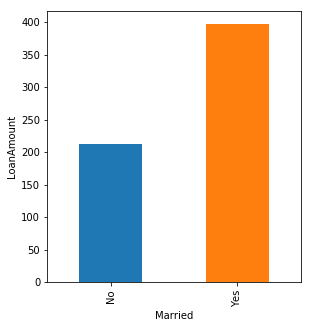

In [35]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Married')
ax1.set_ylabel('LoanAmount')

married.plot(kind='bar')

In [36]:
ls=df['Loan_Status'].value_counts(ascending=True)
ls.head()

N    192
Y    422
Name: Loan_Status, dtype: int64

In [37]:
#hence most are Y so we are filling missing data with this column by 'Y'
df.Loan_Status=df.Loan_Status.fillna('1')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,4.862066,7024.705081,8.669414,2.401664
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,0.496575,6458.663872,0.545102,0.894732
min,150.000000,0.000000,9.000000,12.00000,0.000000,2.197225,1442.000000,7.273786,0.252292
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,4.607658,4166.000000,8.334712,1.936150
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,4.859812,5416.500000,8.597205,2.417435
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,5.104426,7521.750000,8.925549,2.834513
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,6.551080,81000.000000,11.302204,8.271164


# **OneHotEncoding**

Then we use pd.get_dummies() method to one-hot encode the label ‘Loan_Status’ ( with the integer ‘1’ representing approval of loan. The dataset will be split into training and testing set as a 80-20 split using train_test_split method from sklearn. Random state will be specified as a particular number so that we have a means for comparison later.

In [38]:
#One-hot encode the data using pandas.get_dummies()
features = pd.get_dummies(df['Loan_Status'])

encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)
display(features.head(n = 1))



2 total features after one-hot encoding.
['N', 'Y']


,N,Y
0,0,1


In [39]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents            True
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
LoanAmount_log       False
TotalIncome          False
TotalIncome_log      False
Capacity%            False
dtype: bool

In [40]:
dt=df['Dependents'].value_counts(ascending=True)
dt.head()

3+     51
2     101
1     102
0     345
Name: Dependents, dtype: int64

In [41]:
# So more are 0's so we fill with 0's
df.Dependents=df.Dependents.fillna('0')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,4.862066,7024.705081,8.669414,2.401664
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,0.496575,6458.663872,0.545102,0.894732
min,150.000000,0.000000,9.000000,12.00000,0.000000,2.197225,1442.000000,7.273786,0.252292
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,4.607658,4166.000000,8.334712,1.936150
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,4.859812,5416.500000,8.597205,2.417435
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,5.104426,7521.750000,8.925549,2.834513
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,6.551080,81000.000000,11.302204,8.271164


In [42]:
cs = df['Credit_History'].value_counts(ascending=True)
cs.head()



0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [43]:
df.Credit_History=df.Credit_History.fillna('1.0')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
count,614.000000,614.000000,614.000000,600.00000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,4.862066,7024.705081,8.669414,2.401664
std,6109.041673,2926.248369,84.037468,65.12041,0.496575,6458.663872,0.545102,0.894732
min,150.000000,0.000000,9.000000,12.00000,2.197225,1442.000000,7.273786,0.252292
25%,2877.500000,0.000000,100.250000,360.00000,4.607658,4166.000000,8.334712,1.936150
50%,3812.500000,1188.500000,129.000000,360.00000,4.859812,5416.500000,8.597205,2.417435
75%,5795.000000,2297.250000,164.750000,360.00000,5.104426,7521.750000,8.925549,2.834513
max,81000.000000,41667.000000,700.000000,480.00000,6.551080,81000.000000,11.302204,8.271164


In [44]:
#building predictive model 
#we will use scikit-learn (sklearn), for which we need to convert the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()  #Encode labels with value between 0 and n_classes-1.
for i in col:
    df[i] = le.fit_transform(df[i]) #Fit label encoder and return encoded labels
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
Capacity%            float64
dtype: object

# 3. Making Prediction

## Benchmark model

Benchmark:- Standard, or a set of standards, used as a point of reference for evaluating performance or level of quality. 
Importance:-This information can then be used to identify gaps in an model in order to achieve a competitive advantage.
Here we will consider SVM model as the benchmark model because . We will find out the accuracy of this model and try to achive the better accuracy than this model.It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values.

In [45]:
#Generic function for making a classification model and accessing performance:
from sklearn import metrics

def classification_model(model, df, predictors, outcome):
    model.fit(df[predictors],df[outcome])
    predictions = model.predict(df[predictors])
    accuracy = metrics.accuracy_score(predictions,df[outcome])
    return accuracy
    
    
    #Fit the model again so that it can be refered outside the function:
    model.fit(df[predictors],df[outcome])


In [46]:
#using Logistic regression
outcome_var = ['Loan_Status']
model = LogisticRegression()
predictor_var = ['Gender']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\appu\.anaconda\navigator\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6872964169381107

In [47]:
#gradientBoosting
outcome_var = ['Loan_Status']
model = GradientBoostingClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\appu\.anaconda\navigator\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8094462540716613

In [48]:
#Kneighbiour
outcome_var = ['Loan_Status']
model = KNeighborsClassifier()
predictor_var = ['Married']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\appu\.anaconda\navigator\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


0.6872964169381107

In [49]:
#SVM
outcome_var = ['Loan_Status']
model = SVC()
predictor_var = ['Gender','Married']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\appu\.anaconda\navigator\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6872964169381107

In [50]:
#Decision Tree
model = DecisionTreeClassifier()
predictor_var = ['Gender', 'Married' ,'Dependents']
classification_model(model, df,predictor_var,outcome_var)

0.6889250814332247

In [51]:
#using Random Forest 
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\appu\.anaconda\navigator\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.6954397394136808

In [52]:
model = GradientBoostingClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Credit_History', 'Property_Area', 'Dependents' , 'Education']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\appu\.anaconda\navigator\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8094462540716613

# 4.RESULT

In [53]:
# initialize an empty list
accuracy1 = []

# list of algorithms names
classifiers = ['GradientBoosting','KNN', 'Decision Trees', 'Logistic Regression', 'SVM', 'Random Forests']

# list of algorithms with parameters
models = [GradientBoostingClassifier(),KNeighborsClassifier(), DecisionTreeClassifier(random_state=3000), LogisticRegression(), 
        SVC(), RandomForestClassifier(random_state=2000)]

# loop through algorithms and append the score into the list
for i in models:
    scores=classification_model(i,df,predictor_var,outcome_var)
    accuracy1.append(scores)

    
    
    
    


C:\Users\appu\.anaconda\navigator\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\appu\.anaconda\navigator\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\appu\.anaconda\navigator\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\appu\.anaconda\navigator\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [54]:
summary=pd.DataFrame({'accuracy': accuracy1} ,index=classifiers)
summary

,accuracy
GradientBoosting,0.811075
KNN,0.804560
Decision Trees,0.812704
Logistic Regression,0.809446
SVM,0.809446
Random Forests,0.811075


## Conclusion


Out of the above chosen models Gradient BOosting yields the better accuracy of 0.6954 than the other models.By using all the above  models we get better accuracy than the benchmark model.
But out of those we can see that the  Gradient BOosting have the better accuracy than the others
So I can say that the Gradient BOosting is the better algorithm which can be used to predict whether the loan approval can be approved to the customer or not.

The result is Gradient Boosting Classifier have the highest score from other classification algorithm. These result are similar to my previous works.

###  Visualization

<BarContainer object of 6 artists>

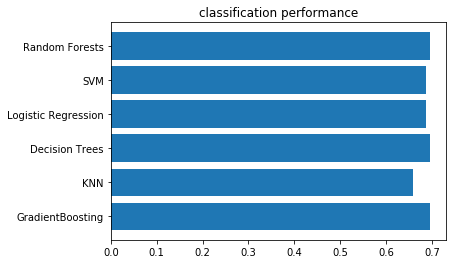

In [285]:
x_axis=['GradientBoosting','KNN', 'Decision Trees', 'Logistic Regression', 'SVM', 'Random Forests']
y_axis=[0.695440,0.659609,0.695440,0.687296,0.687296,0.695440]
plt.title('classification performance')
plt.barh(x_axis,y_axis)

## Reference
1. J. Heo and J. Y. Yang, "AdaBoost Based Bankruptcy Forecasting of Korean Construction Company," Applied Soft Computing, vol. 24, pp. 494-499, 2014.
2. C.-F. Tsai, "Feature Selection in Bankruptcy Prediction," Knowledge Based System, pp. 120-127, 2009.